# Лаборабоная работ 2
МОДЕЛИРОВАНИЕ ДИСКРЕТНЫХ СИГНАЛОВ 

_Домашняя подготовка_

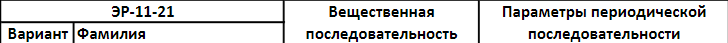

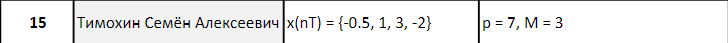

Выксель 3 -1 -0.5 -3  p = 5  M = 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

1. Представление дискретной последовательности в графическом виде

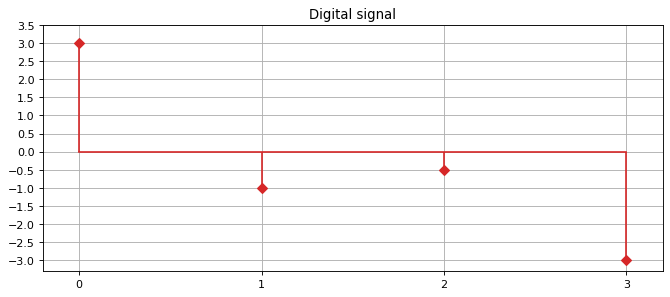

In [7]:
# Digital signal
#xt = np.array([-0.5, 1, 3, -2])
xt = np.array([3, -1, -0.5, -3])

# Time vector
t = np.linspace(0, xt.size-1, xt.size, endpoint=True)

# Plot figure
plt.figure(figsize=(10, 4), dpi=80)
plt.title('Digital signal') 
plt.stem(t, xt, linefmt='C3', markerfmt='D')
plt.xticks(t)
plt.yticks(np.arange(min(xt), max(xt)+1,0.5))
plt.xlim([np.min(t)-0.2, np.max(t)+0.2])
plt.grid(True)

2. Записать выражения для спектральной плотности

-0.5 + 1*Z^-1 + 3*Z^-2 + =2*Z^-3

C:\Users\User\AppData\Local\Temp\ipykernel_19664\970727364.py:32: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sig, use_line_collection=True, basefmt='C0')


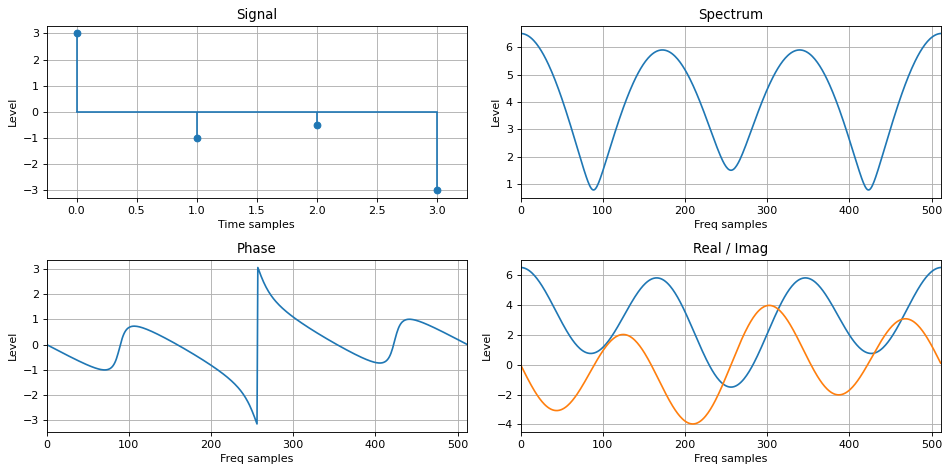

In [8]:
# signal
#x = np.array([-0.5, 1, 3, -2])
x = np.array([3, -1, -0.5, -3])

# Z-form:
# X(z) = -0.5 + 1*Z^-1 + 3*Z^-2 + =2*Z^-3, where z = exp(-jwT)

# Forward FFT
N = 512

xFFT = fftshift(fft(x, N))
# Magnitude spectrum
xA = np.abs(xFFT)
# Phase spectrum
xF = np.angle(xFFT)

# Complex
xReal = np.real(xFFT)
xImag = np.imag(xFFT)

# List of signals
xT = [x, xA, xF, np.array([xReal, xImag]).T]
lst_title = ['Signal', 'Spectrum', 'Phase', 'Real / Imag']

# Plot results
fig = plt.figure(figsize=(12, 6), dpi=80)
for i, sig in enumerate(xT):
    plt.subplot(2, 2, i+1)
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, use_line_collection=True, basefmt='C0')
        plt.xlabel('Time samples')
        plt.xlim([-0.25, len(x)-0.75])
    else:
        plt.plot(sig)
        plt.xlabel('Freq samples')
        plt.xlim([0, N-1])
    plt.grid()
plt.tight_layout()

3. Посмотрим, как изменится спектральная плотность периодической последовательности `x(nT)`, если её повторить $M$ раз через определенное число тактов с периодом $N$, где $M$ – количество повторений дискретной последовательности.

В качестве примера возьмем последовательность 

`x(nT) = {-0.5, 1, 3, -2}, M = 3, N = 7`.

In [9]:
#N = 7    # Signal period
#M = 3    # Number of repeats
N = 5    # Signal period
M = 2    # Number of repeats
# Signal
x = np.zeros(N)
signal = [3, -1, -0.5, -3]
x[0:4] = signal
y = np.tile(x, M) # функция tile повтораяет элементы массива x M раз
y

array([ 3. , -1. , -0.5, -3. ,  0. ,  3. , -1. , -0.5, -3. ,  0. ])

Max amplitude = sum of ones * M = 11.280979225054194


C:\Users\User\AppData\Local\Temp\ipykernel_19664\1844488269.py:32: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sig, use_line_collection=True, basefmt='C0')


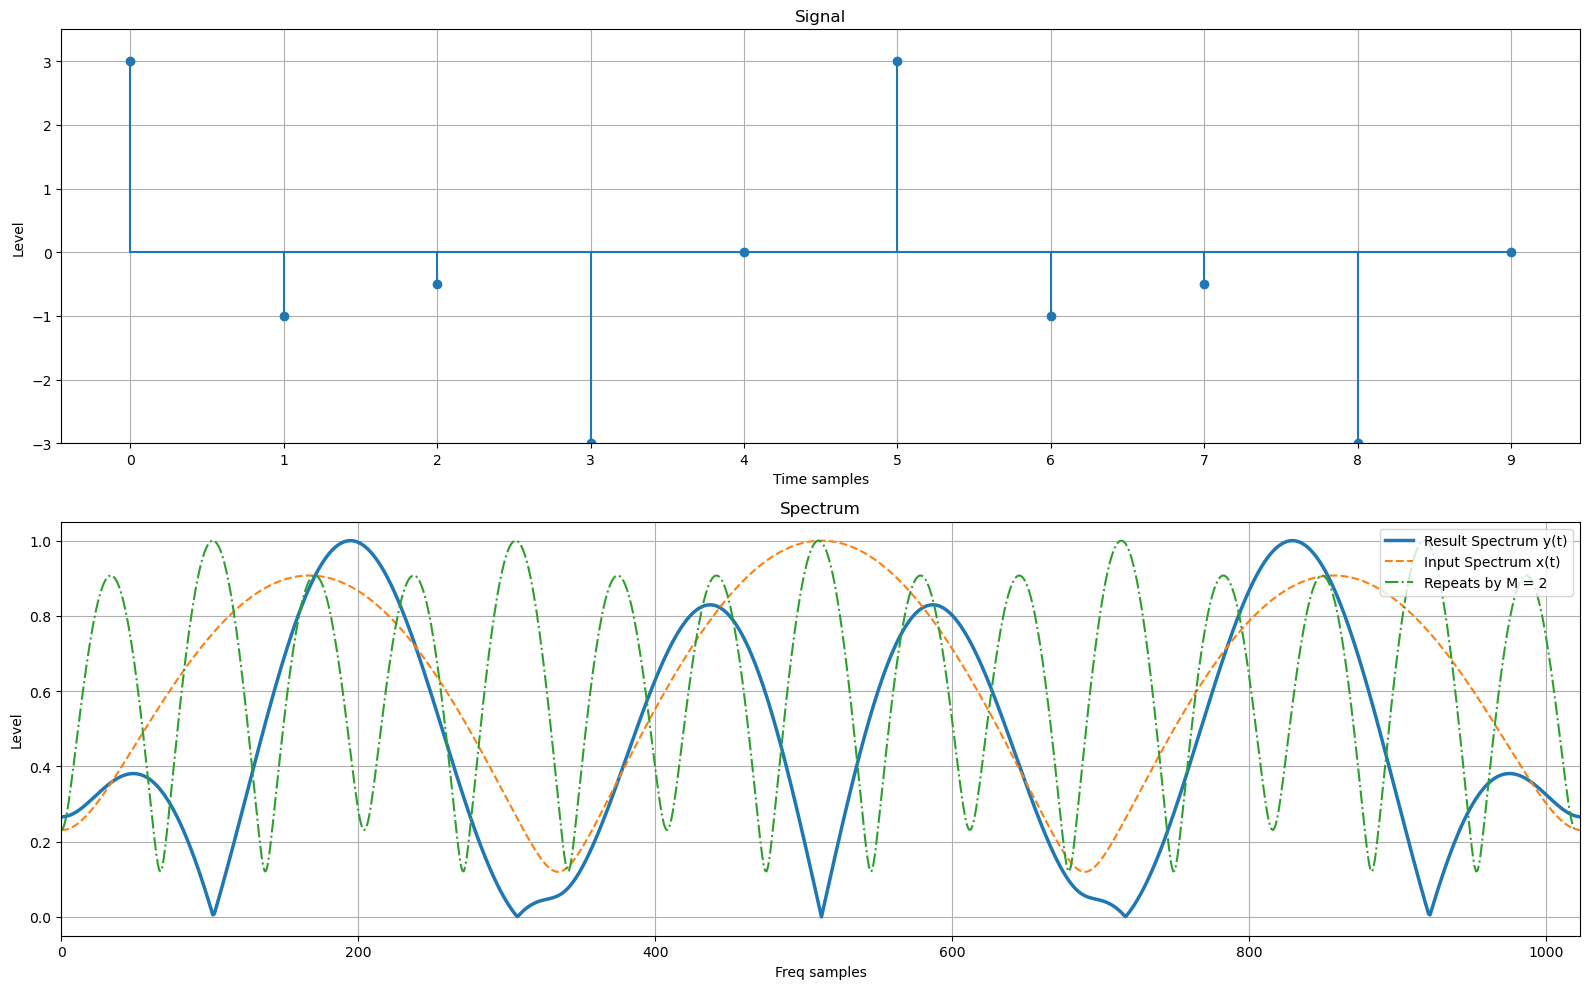

In [10]:
# Forward FFT
NFFT = 1024
xFFT = fft(y, NFFT)
# Magnitude spectrum
yA = np.abs(xFFT)
print('Max amplitude = sum of ones * M = {}'.format(yA.max()))
yA /= np.max(yA)

# FFT for input signal
xFFT = fft(signal, NFFT)
# Magnitude spectrum
xA = np.abs(xFFT)
xA /= np.max(xA)

# FFT for repeats
xFFT = fft(x, NFFT//N)
# Magnitude spectrum
xM = np.abs(xFFT)
xM /= np.max(xM)
xM = np.tile(xM, N)
#List of signals
xT = [y, yA]
lst_title = ['Signal', 'Spectrum', 'Phase']

# Plot results
fig = plt.figure(figsize=(16, 10), dpi=100)
for i, sig in enumerate(xT):
    plt.subplot(2, 1, int(2**i))
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, use_line_collection=True, basefmt='C0')
        plt.xlabel('Time samples')
        plt.ylim([-3, 3.5])
        plt.xticks(np.arange(0, y.size,1))
        
    else:
        
        plt.plot(sig, '-', linewidth=2.5, label='Result Spectrum y(t)')
        plt.plot(xA, '--', linewidth=1.5, label='Input Spectrum x(t)')
        plt.plot(xM, '-.', linewidth=1.5, label='Repeats by M = %d' % M)
        plt.xlabel('Freq samples')
        plt.xlim([0, NFFT-1])
        plt.legend(loc='upper right')
    plt.grid()
plt.tight_layout()

xF1 = np.angle(xFFT)

### Построение графиков фазы для входной, повторённой и результирующей спетарльной плотности

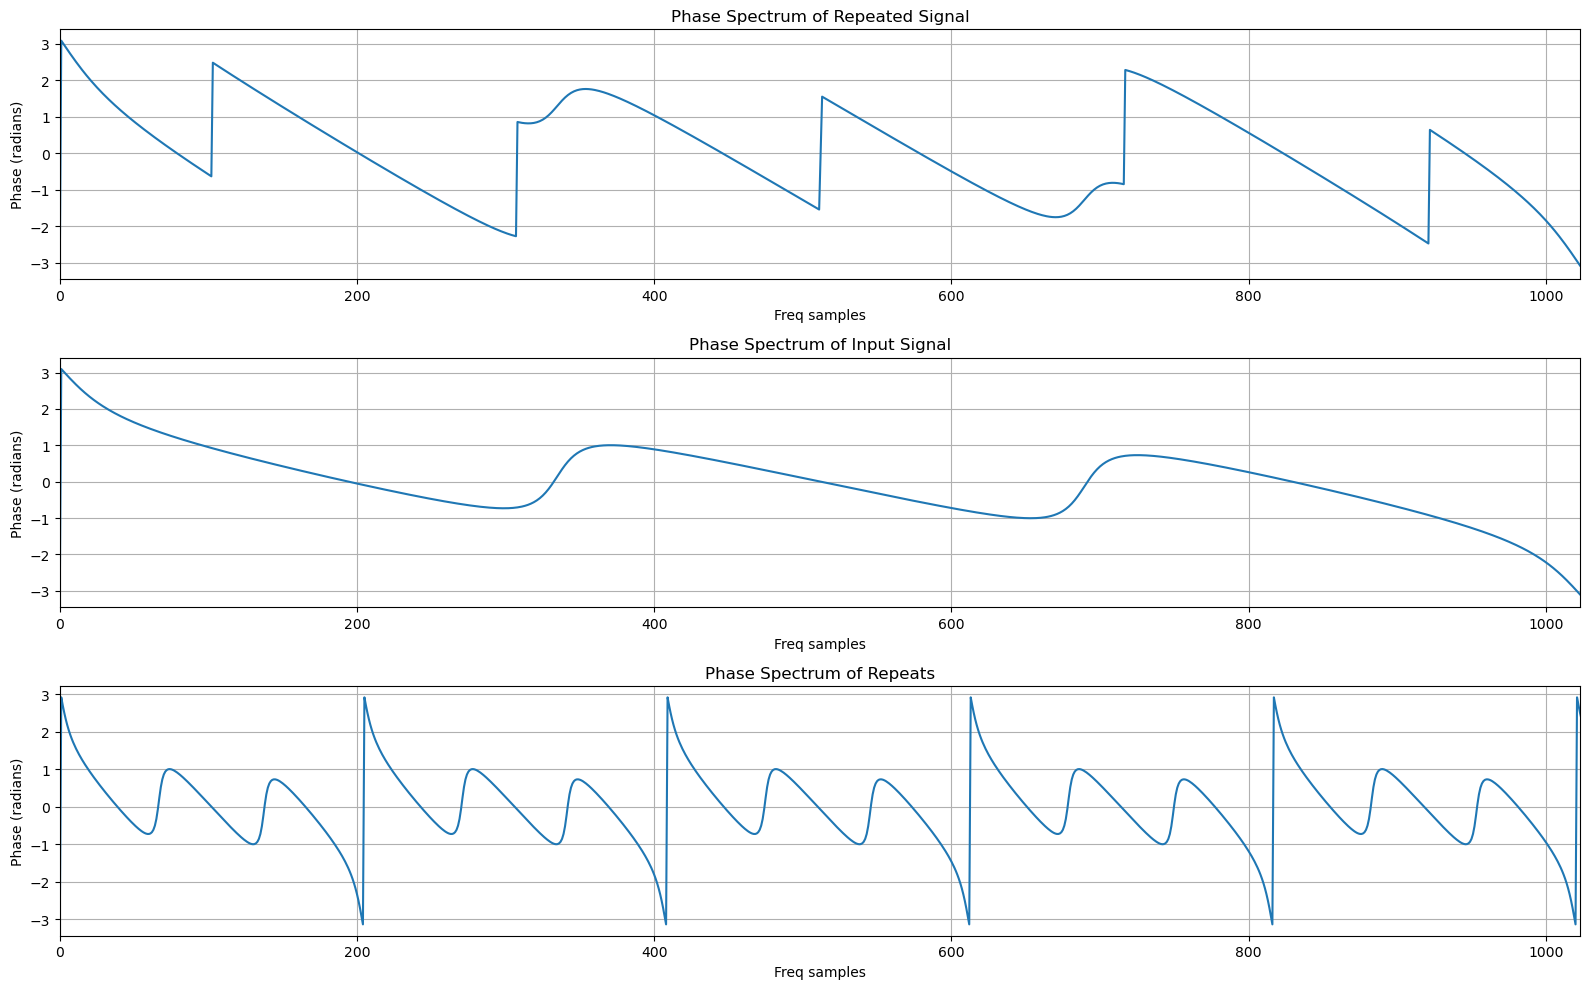

In [11]:
#N = 7    # Signal period
#M = 3    # Number of repeats
N = 5    # Signal period
M = 2    # Number of repeats
# Signal
x = np.zeros(N)
signal = [3, -1, -0.5, -3]
x[0:4] = signal
y = np.tile(x, M) # функция tile повтораяет элементы массива x M раз

# Прямое преобразование Фурье (FFT)
NFFT = 1024
xFFT = fft(y, NFFT)

# Спектр фазы
yF = np.angle(xFFT)

# FFT для входного сигнала
xFFT_input = fft(signal, NFFT)
yF_input = np.angle(xFFT_input)

# FFT для повторений
xFFT_repeats = fft(x, NFFT // N)
#! Значение NFFT // N вычисляет размер FFT на основе общей размерности NFFT, 
#! разделенной на период сигнала N

yF_repeats = np.tile(np.angle(xFFT_repeats),7)

# Список сигналов
signals = [yF, yF_input, yF_repeats]
titles = ['Phase Spectrum of Repeated Signal', 'Phase Spectrum of Input Signal', 'Phase Spectrum of Repeats']

# Построение графиков
fig = plt.figure(figsize=(16, 10), dpi=100)
for i, sig in enumerate(signals):
    plt.subplot(3, 1, i + 1)
    plt.plot(sig, label=titles[i])
    plt.ylabel('Phase (radians)')
    plt.title(titles[i])
    plt.xlim([0, NFFT-1])
    plt.xlabel('Freq samples')
    plt.grid()

plt.tight_layout()
plt.show()